In [5]:
!pip install gender_guesser

  Using cached https://files.pythonhosted.org/packages/13/fb/3f2aac40cd2421e164cab1668e0ca10685fcf896bd6b3671088f8aab356e/gender_guesser-0.4.0-py2.py3-none-any.whl


In [114]:
from collections import namedtuple, defaultdict
import re

# import requests
from bs4 import BeautifulSoup
import gender_guesser.detector as gender

In [13]:
files = {int(f"201{i}"): f"pycon201{i}.html" for i in range(3,9)}

In [14]:
files

{2013: 'pycon2013.html',
 2014: 'pycon2014.html',
 2015: 'pycon2015.html',
 2016: 'pycon2016.html',
 2017: 'pycon2017.html',
 2018: 'pycon2018.html'}

## pycon 2013

In [139]:
with open(files[2013]) as f:
    soup2013 = BeautifulSoup(f.read())
    
names_2013 = []
for a in soup2013.find_all('a', href=True):
    href = a['href']
    name = a.text
    if 'twitter.com' in href and not '/#' in href and not href.endswith('/'):
        names_2013.append(name.strip())

print(len(names_2013))
print(names_2013)

45
['Miguel Araujo', 'Mayte Giménez', 'Juan Luis Cano', 'Enrique Iglesias', 'Alberto Pérez', 'Eduardo Ferro', 'Guillermo Pascual', 'Nestor Salceda', 'Pablo Enfedaque Vidal', 'Jordi Saludes Closa', 'Esteban Montes Morales', 'Diego Sarmentero', 'Maria Antònia Tugores Pons', 'Juan B Cabral', 'Saul Diez-Guerra', 'Quique Porta', 'Guillermo Vayá Pérez', 'Alicia Lapique', 'Juan B Cabral', 'Iván Pedrazas', 'Juan Riaza', 'Diego Sarmentero', 'Saúl Ibarra Corretgé', 'CAChemE', 'Francisco J. Navarro-Brull', 'Isaías Cuenca', 'Jorge Bernabé', 'Juan Luis Cano', 'Andrey Antukh', 'Alberto Pérez', 'Eduardo Ferro', 'Guillermo Pascual', 'Nestor Salceda', 'Esteve Fernandez', 'Kiko Correoso', 'José Luis Cercós Pita', 'Miguel Araujo', 'Javier J. Gutiérrez Rodríguez', 'Jorge Bastida', 'Saul Diez-Guerra', 'Pablo Enfedaque Vidal', 'Jesús Espino García', 'Pedro Varo Herrero', 'David Arcos', 'José Ignacio Galarza']


## pycon 2014

In [140]:
with open(files[2014]) as f:
    soup2014 = BeautifulSoup(f.read())

names_2014 = []
for h1 in soup2014.find_all('h1'):
    if 'text-center' in str(h1):
        name = h1.text.strip()
        if ' y ' in name:
            for n in name.split(' y '):
                names_2014.append(n)
        else:
            names_2014.append(name)
        
print(len(names_2014))
print(names_2014)

48
['Víctor Terrón', 'David Arcos', 'Saul Diez-Guerra', 'Aitor Guevara', 'James Powell', 'Ivan Compañy', 'Lluis Esquerda', 'James Powell', 'Christine Doig', 'Mayte Gimenez', 'Angela Rivera', 'Jesús Cea', 'Jesús Espino', 'Jose A. Rocamonde', 'Toni Robres Turón', 'Miguel Angel Garcia', 'Jaime Crespo', 'Juan Riaza', 'Salvador de la Puente González', 'Miguel Angel Marco', 'Francisco Fernandez Castaño', 'Javier santana', 'CodeSyntax - Aitzol Naberan', 'Alejandro Enrique Brito Monedero', 'Guillem borrell', 'Samuel de ancos', 'Alejandro Guirao', 'Ivan Pedrazas', 'Néstor Salceda, Eduardo Ferro, Jaime Gil de Sagredo, Alberto Pérez', 'Pedro Varo Herrero', 'Cacheme', 'pybonacci', 'Javier Gutierrez', 'Fernando Salamero', 'Enrique Porta', 'Jose Luis Cercos', 'Oriol Rius', 'Miquel Camprodon e Israel Saeta', 'PyLadies', 'Jesus Espino', 'Eyad toma', 'Eduardo Ferro', 'Kiko correoso', 'Nuria pujol', 'Alejandro Gómez', 'Kiko Correoso', 'Víctor Terrón', 'Jaime Gil de Sagredo']


## pycon 2015

In [141]:
def get_names_from_slot_inner(year):
    with open(files[year]) as f:
        soup = BeautifulSoup(f.read())

    names = []
    for slot in soup.find_all("div", class_="slot-inner"):
        if '<p><strong>' in str(slot):
            name = slot.find('p').text
            if ' y ' in name:
                for n in name.split(' y '):
                    names.append(n)
            else:
                names.append(name)
    return names

names_2015 = get_names_from_slot_inner(2015)
print(len(names_2015))
print(names_2015)

63
['Francesc Alted', 'Joaquín del Cerro', 'Miguel Sánchez Rodríguez', 'Miguel González Nieto', 'Alejandro Vidal', 'Carlos Dorado', 'Siro Moreno', 'Anton Caceres', 'Andreu Belmonte Peña', 'Miguel Araujo', 'Christine Doig', 'Roberto Majadas Lopez', 'Jose Ignacio Galarza', 'Javier Vegas Regidor', 'Israel D. Aguilar', 'Salvador de la Puente González', 'Alberto Labarga', 'Raúl Cumplido', 'Jesús Cea', 'Alejandro Vidal', 'Guillermo Vayá Pérez', 'Jordi Soucheiron Estruch', 'Daniel Domene', 'Carlos Planelles', 'Pablo Enfedaque', 'Federico Mon', 'Israel Saeta Pérez', 'Miquel Camprodon', 'Cesar Cardenas Desales', 'Jesús Espino', 'Sergi Sorribas', 'Pablo Enfedaque', 'Imanol Cea', 'José Manuel Ortega', 'Francisco Fernández Castaño', 'Carlos Perelló Marín', 'Anton Ferré Pujol', 'Miguel Sánchez Rodríguez', 'Miguel González Nieto', 'Jose Gargallo', 'Guillem Borrell Nogueras', 'Urtzi Odriozola Lizaso', 'Miguel Araujo', 'Jose Ignacio Galarza', 'Edu Herraiz', 'Mikel Larreategi', 'Braulio Valdivielso', '

## pycon 2016


In [142]:
names_2016 = get_names_from_slot_inner(2016)
print(len(names_2016))
print(names_2016)

75
['Francisco Navarro-Brull, Zuria Bauer, Benjamin Laken', 'Sergi Almacellas Abellana', 'Siro Moreno', 'Andros Fenollosa', 'Jaime Gil de Sagredo, Isidro López, Alberto Pérez', 'Alvaro del Castillo San Felix', 'Carlos Dorado', 'Siro Moreno', 'Guillem Borrell Nogueras', 'Opening and Cajamar PythonHack 2016 Presentation', 'Gema Parreño', 'Jesús Espino', 'Adrián Matellanes', 'Juan Javaloyes, Fran Navarro', 'Alejadro Gómez Morón', 'Tomas Garzon Hervas', 'Uzi Halaby-Senerman', 'Agustín Herranz Cecilia', 'Ivan Pedrazas', 'Antònia Tugores', 'Jose Maria Alvarez Rey', 'Roberto Majadas Lopez', 'Robert Figiel', 'Daniel García Moreno', 'José Manuel Rivas García', 'Juan Diego Godoy Robles', 'Mario Corchero', 'Héctor Pablos López', 'Federico Mon', 'Israel Blancas Álvarez', 'Andros Fenollosa', 'Siro Moreno', 'Juan Rodríguez Monti', 'David Arcos', 'Zuria Bauer Hartwig', 'ANTONI ALOY', 'Miguel Sánchez de León Peque', 'Victor Suarez Garcia', 'Daniel Domene', 'Carlos Planelles', 'Miguel Sánchez de León P

## pycon 2017

In [143]:
names_2017 = get_names_from_slot_inner(2017)
print(len(names_2017))
print(names_2017)

66
['Irene Pérez Encinar, Javier Torres Niño', 'Pablo Galindo', 'Andros Fenollosa Hurtado', 'Gema Parreño, Santiago Saavedra', 'Alejandro Gómez Morón, Ignacio González Bullón, Pablo Iglesias', 'José Manuel Rivas García', 'Juan Aragón', 'David Saltares', 'Opening', 'Diego Muñoz', 'Antònia Tugores', 'Oscar Ramírez', 'Javi Romero', 'Rodrigo Cabello', 'Javier Torres Niño', 'Miguel Jiménez', 'Ricardo Guerrero Gómez-Olmedo', 'Luis Mesas', 'Miguel González Álvarez', 'J.C. González-Avella', 'J. M. Tuduri', 'Jose Luis Cercos-Pita', 'Álvaro León', 'Valery Calderón Briz', 'Jose Miguel Leiva Murillo', 'Roberto Majadas', 'Manuel Zaforas', 'Naomi Ceder', 'Alberto Fernandez Valiente', 'Roberto Abdelkader Martínez Pérez', 'Antonio Hidalgo, Juan Luis Cano', 'Alicia Pérez, Javier Abadía', 'Adrián Matellanes', 'Siro Moreno', 'Pablo Galindo Salgado and Victor Terrón', 'Beatriz González', 'Santiago Saavedra', 'José Javier Merchante', 'Andrés Rojano Ruiz', 'Jose Manuel Ortega', 'David Saltares', 'Andy Almon

## pycon 2018

In [144]:
with open(files[2018]) as f:
    soup2018 = BeautifulSoup(f.read())

names_2018 = []
for div in soup2018.find_all("div", class_="schedule__talk--speaker"):
    name = div.find('p').text
    names_2018.append(name)
        
print(len(names_2018))
print(names_2018)

61
['Francisco Correoso,  Guillem Duran,  Juan Carlos González,  Jordi Contestí,  Antònia Tugores', 'Raúl VillaresAlberto de la Cruz', 'Sara Rodríguez López', 'Miguel Sánchez de León Peque', 'Víctor Muñoz', 'Alba Carrero,  Juan Javaloyes, Daniel Vázquez ', 'Claudia Guirao Fernández', 'Federico Mon', 'Álvaro León Santiago', 'Rafa Haro', 'Fernando Rabanal', 'Agustín Herranz Cecilia', 'Zuria Bauer', 'Sara Iris García Avila', 'Andreu Vallbona', 'Rafael Castillo Alcibar', 'Teresa de la Torre', 'Francisco José Fernández Naranjo', 'Guillem Duran Ballester', 'Maribel Tirados Gómez', 'Unai', 'Antonio Vilches', 'Xavier Gil Estarellas', 'Héctor Canto', 'Eulàlia Veny', 'José Antonio Perdiguero', 'Javier Torres Niño', 'Oscar Ramirez Victoria Caparros', 'Pablo Galindo Salgado', 'Irene Pérez Encinar', 'María Medina', 'Andrew Godwin', 'Víctor Terrón', 'Elena Abril Medina', 'Sara Rodríguez López', 'David Barragán Merino', 'Carlos Perales', 'Esteban Dorado Roldan', 'Mario Corchero', 'Alicia PérezJavier 

In [145]:
d = gender.Detector()

In [146]:
d.get_gender('Rafa')

'female'

In [147]:
def _get_name_and_gender(names, dups=True):
    if not dups:
        names = set(names)
    names = [n.split()[0] for n in names]
    return [(n, d.get_gender(n)) for n in names]

all_names = {}

for year in range(2013, 2019):
    names_for_year = locals()[f'names_{year}']
    all_names[year] = _get_name_and_gender(names_for_year)
    
from pprint import pprint as pp

#pp(all_names)

for year, speakers in all_names.items():
    print(year, len(speakers), len([s for s in speakers if 'female' in s[1]]),
          '=>', ', '.join([s[0] for s in speakers if 'female' in s[1]]))

2013 45 3 => Mayte, Maria, Alicia
2014 48 4 => Christine, Mayte, Angela, Nuria
2015 63 3 => Christine, Mercè, Rafa
2016 75 3 => Gema, Alicia, Claudia
2017 66 10 => Irene, Gema, Naomi, Alicia, Beatriz, Ana, Jara, Alicia, Maite, Justyna
2018 61 18 => Sara, Alba, Claudia, Rafa, Sara, Teresa, Maribel, Irene, María, Elena, Sara, Alicia, Mar, Maite, Maria, Marta, Martina, Gloria


In [149]:
gender_types = defaultdict(list)
for _, speakers in all_names.items():
    for s in speakers:
        gender_types[s[1]].append(s[0])

for k, v in gender_types.items():
    print(k, len(v))
print()
print('unkown')
print(sorted(gender_types['unknown']))

male 257
female 40
unknown 37
mostly_male 23
mostly_female 1

unkown
['ANTONI', 'Alejadro', 'Andros', 'Andros', 'Andros', 'Antònia', 'Antònia', 'CAChemE', 'Cacheme', 'Closing', 'CodeSyntax', 'Edu', 'Esteve', 'Eulàlia', 'Geoinquietos', 'J.', 'J.', 'J.C.', 'Javi', 'Javi', 'Josema', 'Kiko', 'Kiko', 'Kiko', 'Néstor', 'Opening', 'Opening', 'Participantes', 'PyLadies', 'Saúl', 'Yamila', 'Zuria', 'Zuria', 'curiosos', 'pybonacci', 'resto', '\u200bJuan']


In [150]:
Stats = namedtuple('Stats', 'speakers women percentage')    

In [151]:
result = {}  # 3.7 order should be intact
percentages = {}
for year, speakers in all_names.items():
    num_speakers = len(speakers)
    num_women = len([s for s in speakers if 'female' in s[1]])
    perc = round(num_women/num_speakers*100, 2)
    
    result[year] = Stats(
        speakers=num_speakers,
        women=num_women,
        percentage=perc
    )
    percentages[year] = perc

pp(result)

percentages

{2013: Stats(speakers=45, women=3, percentage=6.67),
 2014: Stats(speakers=48, women=4, percentage=8.33),
 2015: Stats(speakers=63, women=3, percentage=4.76),
 2016: Stats(speakers=75, women=3, percentage=4.0),
 2017: Stats(speakers=66, women=10, percentage=15.15),
 2018: Stats(speakers=61, women=18, percentage=29.51)}


{2013: 6.67, 2014: 8.33, 2015: 4.76, 2016: 4.0, 2017: 15.15, 2018: 29.51}

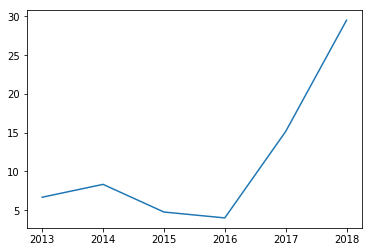

In [152]:
import matplotlib.pylab as plt
# https://stackoverflow.com/a/37266356
lists = sorted(percentages.items())
x, y = zip(*lists)
plt.plot(x, y)
plt.show()